In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from matplotlib import  pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [3]:
df=pd.read_csv("../assets/placement-dataset.csv",usecols=["cgpa","iq","placement"])
df.sample(10)

,cgpa,iq,placement
42,7.6,89.0,1
93,6.8,112.0,1
23,NaN,87.0,0
90,7.3,86.0,1
45,6.0,66.0,1
56,6.1,65.0,0
97,6.7,182.0,1
61,7.3,137.0,1
53,8.3,168.0,1
5,7.1,48.0,1


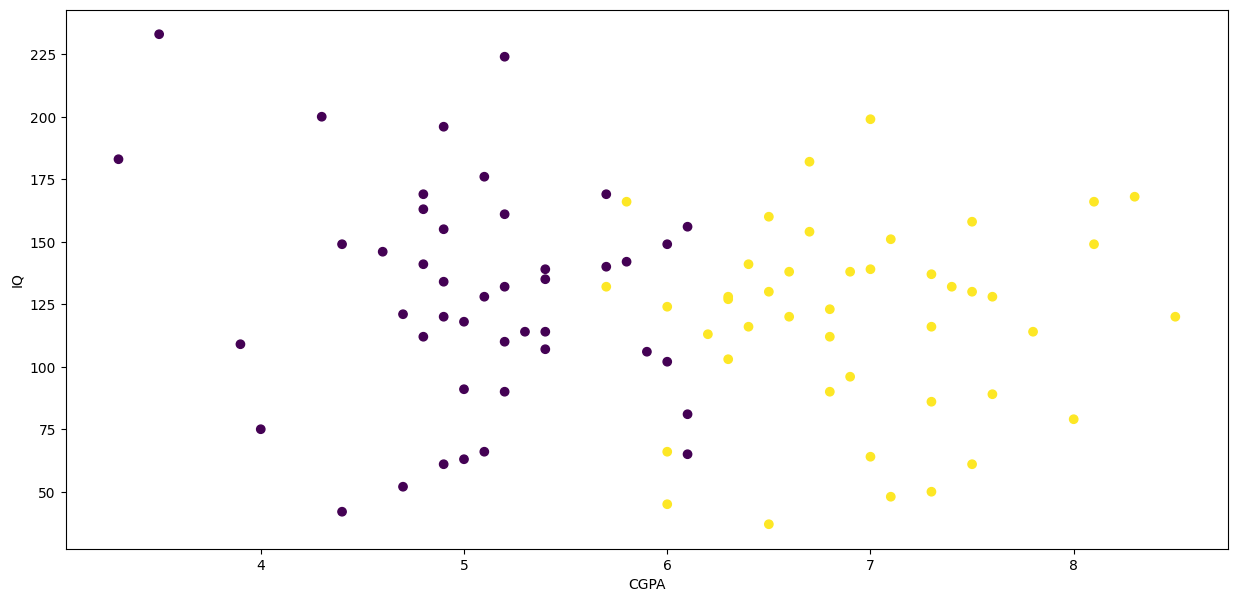

In [4]:
plt.figure(figsize=(15,7))
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()

In [5]:
df.isnull

<bound method DataFrame.isnull of     cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    NaN  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]>

In [6]:
df.isnull().sum()

cgpa         8
iq           4
placement    0
dtype: int64

In [7]:
im=SimpleImputer(strategy="most_frequent") #filling null value by most frequent value
df=im.fit_transform(df)
df=pd.DataFrame(df, columns=['cgpa','iq','placement'])

In [8]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [9]:
df

,cgpa,iq,placement
0,6.8,123.0,1.0
1,5.9,106.0,0.0
2,4.9,121.0,0.0
3,7.4,132.0,1.0
4,5.8,142.0,0.0
...,...,...,...
95,4.3,200.0,0.0
96,4.4,42.0,0.0
97,6.7,182.0,1.0
98,6.3,103.0,1.0


In [10]:


x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2, random_state=42)

x_train.sample(10)

,cgpa,iq
16,5.2,224.0
62,6.0,102.0
88,4.4,149.0
43,4.9,141.0
20,6.6,120.0
91,7.5,158.0
64,7.0,64.0
87,5.7,132.0
54,6.4,141.0
6,5.7,1.0


In [11]:
# Train the model
rfc = RandomForestClassifier(n_estimators=50, random_state=42)  # You can set random_state for reproducibility
rfc.fit(x_train, y_train)



RandomForestClassifier(n_estimators=50, random_state=42)

In [12]:
# Make predictions
y_pred = rfc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.80


In [13]:
confusion_matrix(y_test,y_pred)

array([[8, 2],
       [2, 8]])

In [14]:
dtc=DecisionTreeClassifier(random_state=42,max_depth=4)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

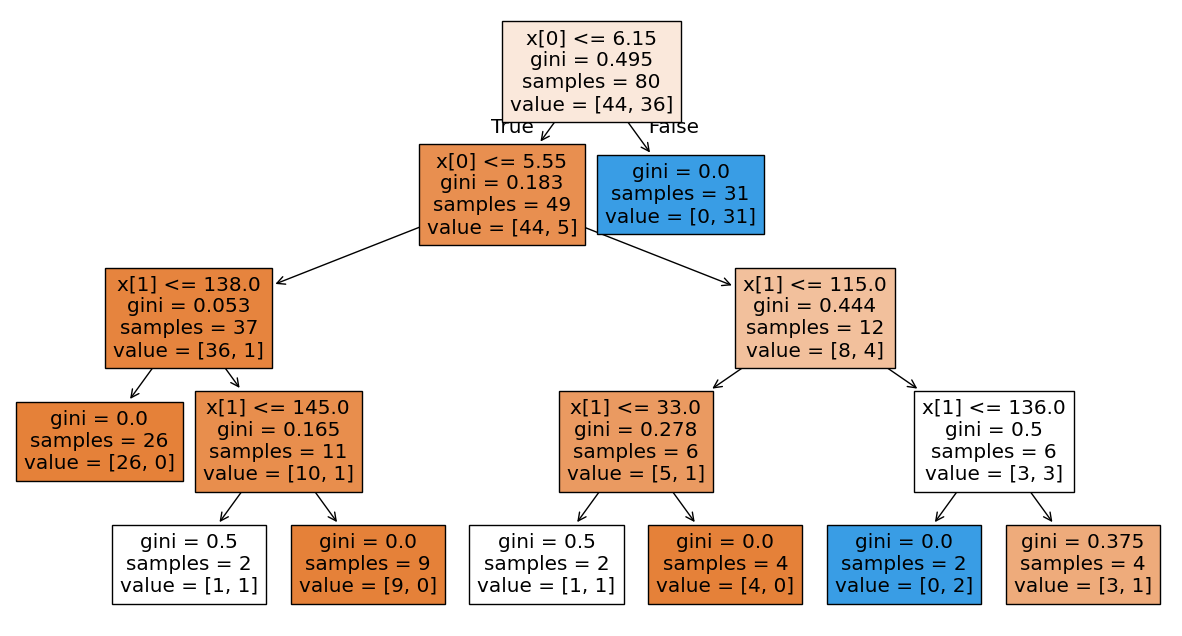

In [15]:
plt.figure(figsize=(15,8))
plot_tree(dtc,filled=True)
plt.show()

In [16]:
y_pred=dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9

/home/jeevan/Desktop/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


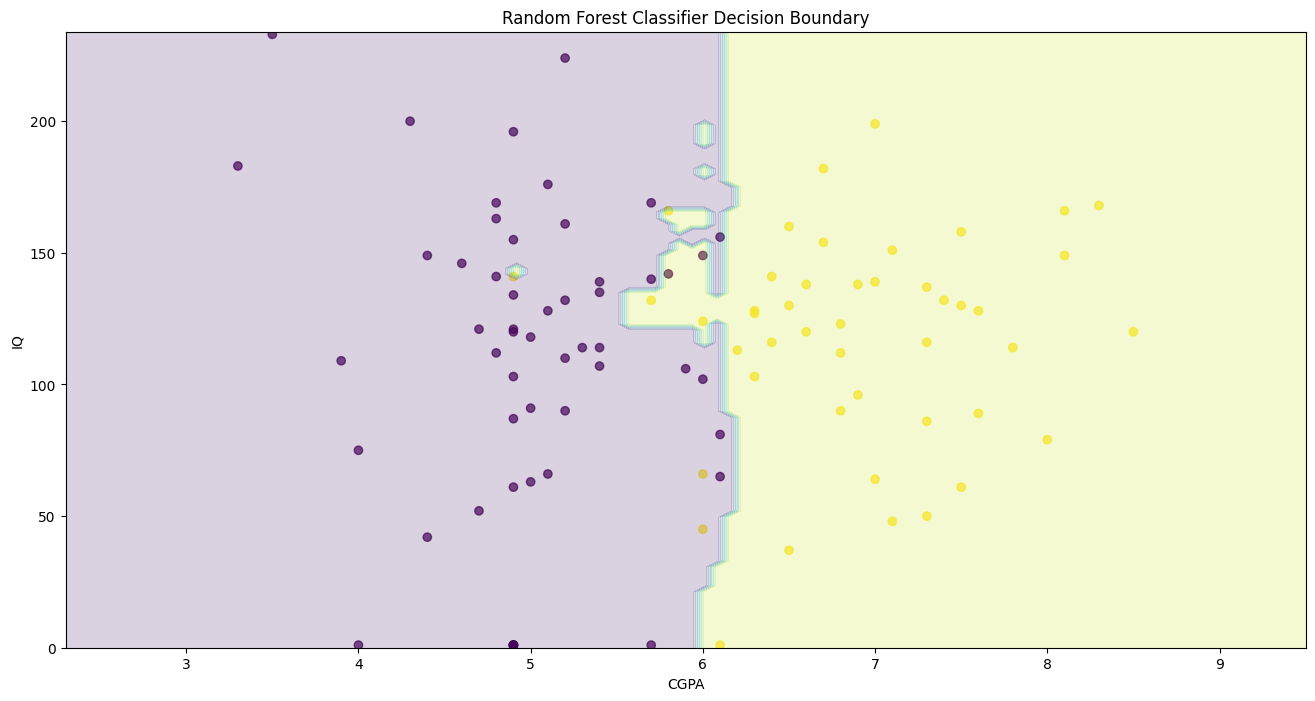

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(df["cgpa"],df["iq"],c=df["placement"],cmap="viridis",alpha=.7)
x_min,x_max=df["cgpa"].min()-1,df["cgpa"].max()+1
y_min,y_max=df["iq"].min()-1,df["iq"].max()+1
x_range=np.linspace(x_min,x_max,100)
y_range=np.linspace(y_min,y_max,100)
xx1, xx2 = np.meshgrid(x_range, y_range) 
y_hat = rfc.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2, cmap="viridis")

# Show the plot
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Random Forest Classifier Decision Boundary')
plt.show()



/home/jeevan/Desktop/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


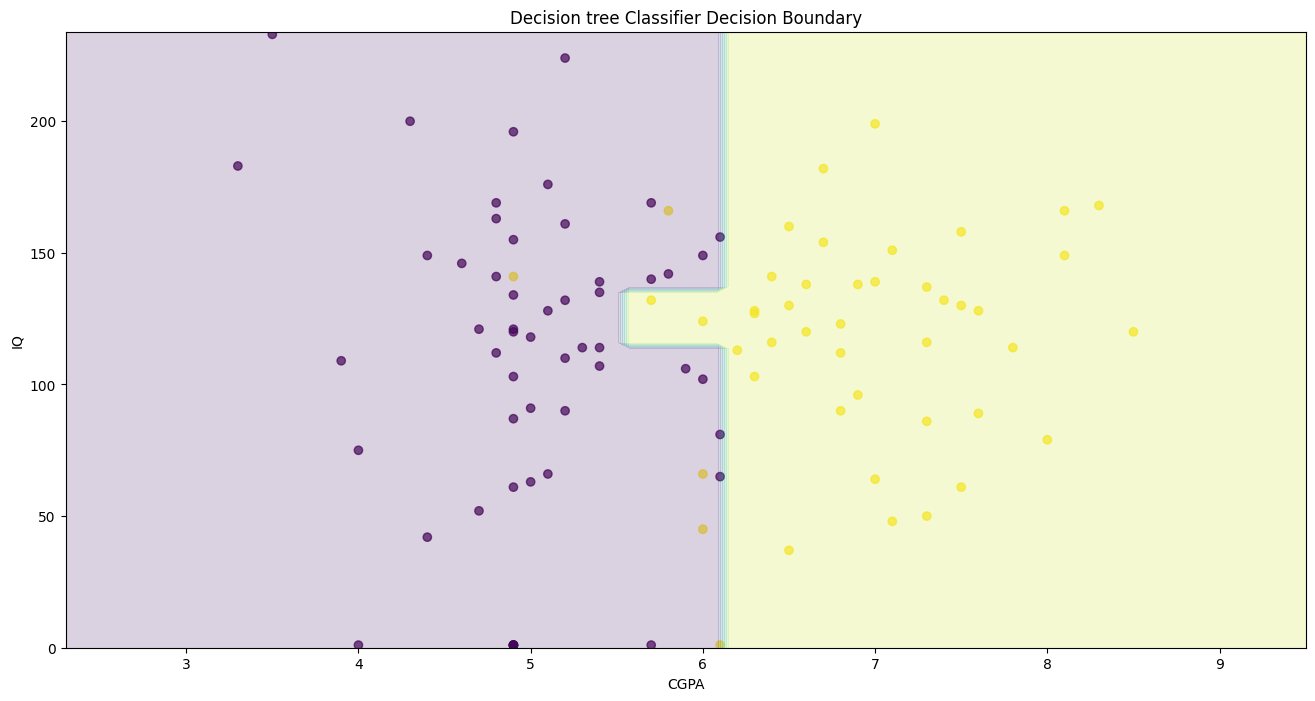

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(df["cgpa"],df["iq"],c=df["placement"],cmap="viridis",alpha=.7)
x_min,x_max=df["cgpa"].min()-1,df["cgpa"].max()+1
y_min,y_max=df["iq"].min()-1,df["iq"].max()+1
x_range=np.linspace(x_min,x_max,100)
y_range=np.linspace(y_min,y_max,100)
xx1, xx2 = np.meshgrid(x_range, y_range) 
y_hat = dtc.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2, cmap="viridis")

# Show the plot
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Decision tree Classifier Decision Boundary')
plt.show()



In [19]:
df.sample(10)

,cgpa,iq,placement
77,7.3,50.0,1.0
52,4.9,1.0,0.0
72,7.3,116.0,1.0
59,4.8,112.0,0.0
27,6.0,124.0,1.0
41,5.4,114.0,0.0
58,8.0,79.0,1.0
57,6.5,130.0,1.0
74,6.7,154.0,1.0
31,3.9,109.0,0.0


In [20]:
q=np.array(df.iloc[1,:2])
q


array([  5.9, 106. ])

In [21]:
q.shape

(2,)

In [22]:


dtc.predict(q.reshape(1,-1))

/home/jeevan/Desktop/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [23]:
import pickle

In [24]:


# Save the trained model to a pickle file
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

print("Model saved as decision_tree_model.pkl")




Model saved as decision_tree_model.pkl


In [25]:
q.reshape(-1,1)

array([[  5.9],
       [106. ]])

In [26]:
with open('decision_tree_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
loaded_model.predict(q.reshape(1,-1))

/home/jeevan/Desktop/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [29]:
df["cgpa"].corr(df["placement"])

np.float64(0.8129059701764488)